In [26]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.concat([X, y], axis=1)

In [4]:
df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


Explaratory Data Analysis

In [5]:
df.shape

(699, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [7]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [8]:
df = df.dropna()
df.shape

(683, 10)

In [9]:
df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


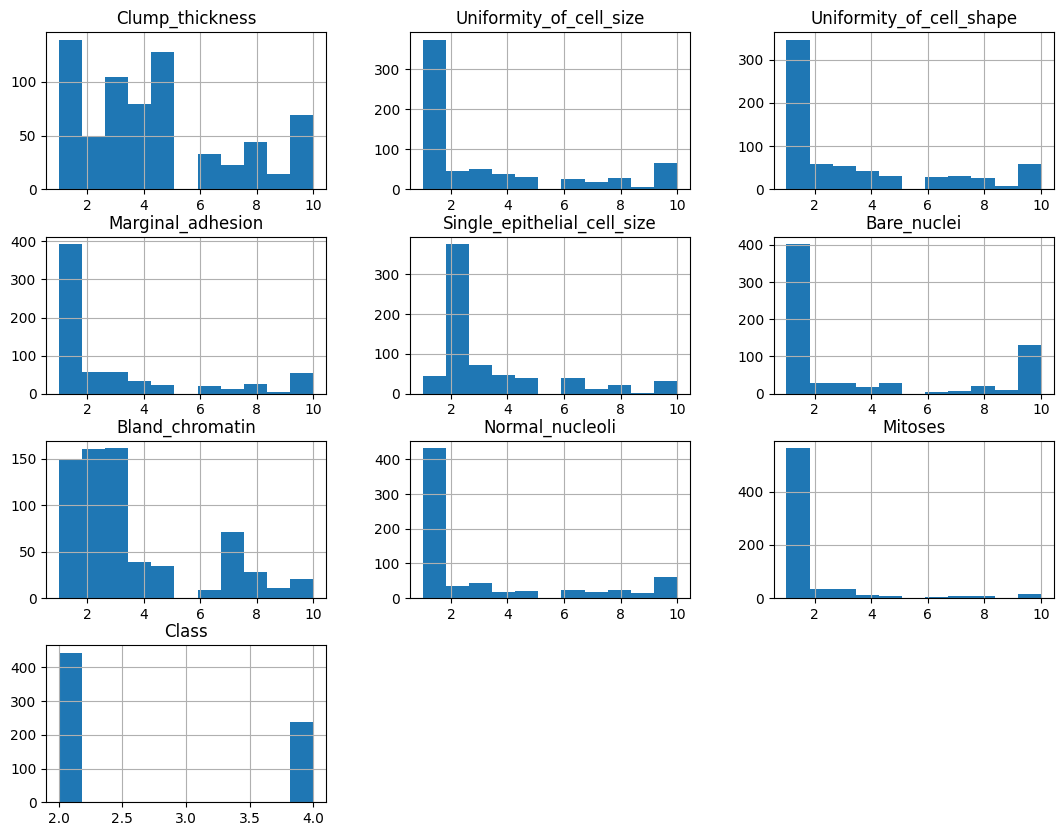

In [10]:
df.hist(bins=11, figsize=(13,10))
plt.show()

<Axes: >

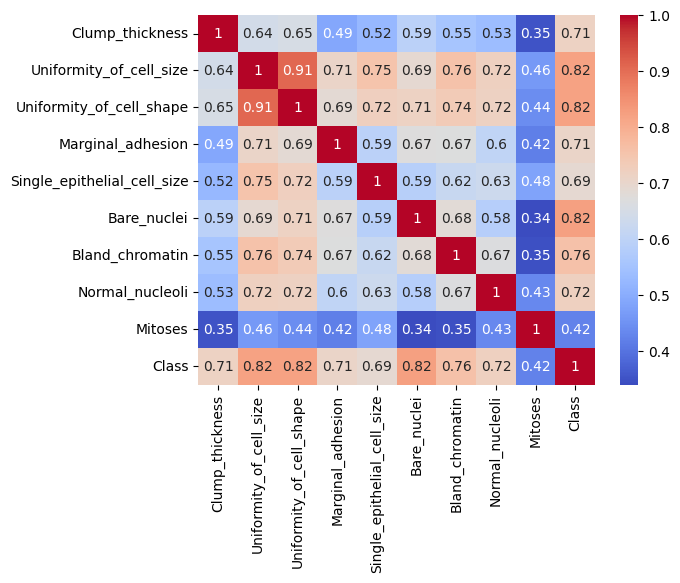

In [11]:
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

checking outliers

In [12]:
total_outliers = 0

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = (df[col] < lower) | (df[col] > upper)

    count = outliers.sum()
    print(f"{col}: {count} outliers")

Clump_thickness: 0 outliers
Uniformity_of_cell_size: 0 outliers
Uniformity_of_cell_shape: 0 outliers
Marginal_adhesion: 59 outliers
Single_epithelial_cell_size: 54 outliers
Bare_nuclei: 0 outliers
Bland_chromatin: 20 outliers
Normal_nucleoli: 75 outliers
Mitoses: 120 outliers
Class: 0 outliers


replacing outliers

In [13]:
df_rem_out = df.copy()

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()

    df_rem_out[col] = np.where((df_rem_out[col] < lower)|(df_rem_out[col] > upper), median, df_rem_out[col])

In [14]:
total_outliers = 0

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = (df_rem_out[col] < lower) | (df_rem_out[col] > upper)

    count = outliers.sum()
    print(f"{col}: {count} outliers")

Clump_thickness: 0 outliers
Uniformity_of_cell_size: 0 outliers
Uniformity_of_cell_shape: 0 outliers
Marginal_adhesion: 0 outliers
Single_epithelial_cell_size: 0 outliers
Bare_nuclei: 0 outliers
Bland_chromatin: 0 outliers
Normal_nucleoli: 0 outliers
Mitoses: 0 outliers
Class: 0 outliers


replace target labels from 2 → 0 (Benign) and 4 → 1 (Malignant)

In [15]:
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [16]:
y = y.replace({2: 0, 4: 1})

In [17]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [18]:
y.value_counts()

Class
0        458
1        241
Name: count, dtype: int64

In [19]:
X.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


train test split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

standardize the data

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Decision tree classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

Random forest classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
y_train = y_train.values.ravel()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        95
           1       0.93      0.87      0.90        45

    accuracy                           0.94       140
   macro avg       0.93      0.92      0.92       140
weighted avg       0.94      0.94      0.94       140


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.95      0.93      0.94        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



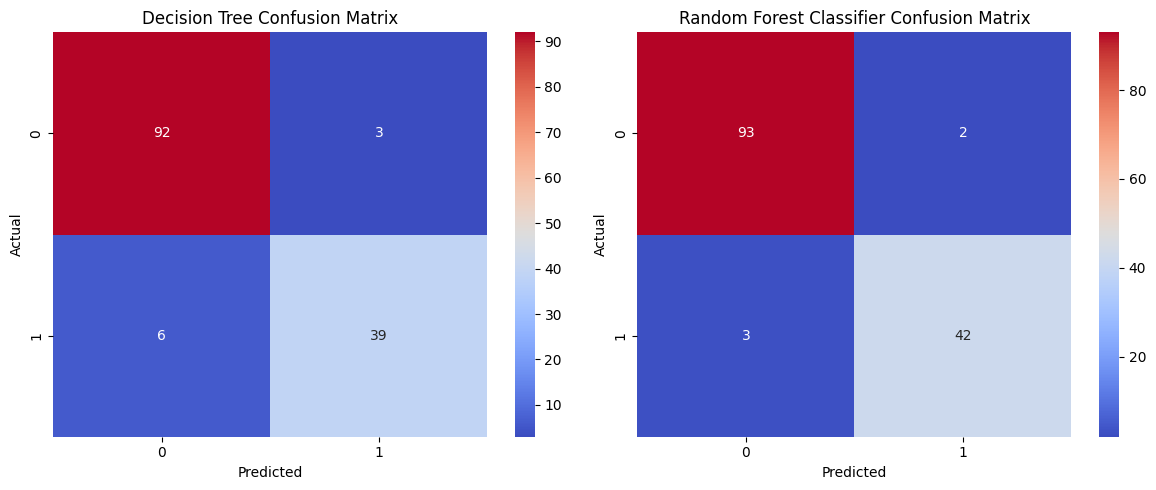

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot=True, ax=axes[0], cmap='coolwarm')
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True, ax=axes[1], cmap='coolwarm')
axes[1].set_title('Random Forest Classifier Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
